In [109]:
import os
import math
import time
import json
import requests
import numpy as np
import pandas as pd
from datetime import datetime, timedelta
from matplotlib import rc
import matplotlib as plt
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from scipy.stats import pearsonr, spearmanr, linregress, shapiro, kstest, norm
from sklearn.metrics import mean_absolute_error, mean_squared_error

# loading data and preprocessing

In [110]:
df = pd.read_csv('SEPT29-OCT2.csv') #one week data
df

,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,20241001050058,13,3,3,30,3,6,4,3,3,42,17.0,93.6,0.042,0.0,0.0,0.000,135.00,1.13
1,20241001045954,13,4,3,24,4,7,4,3,3,13,17.0,93.7,0.042,0.0,0.0,0.004,135.00,1.15
2,20241001045849,13,4,3,24,6,9,4,1,1,13,17.0,93.7,0.043,0.0,0.0,0.001,89.29,1.11
3,20241001045745,13,6,3,27,1,7,4,3,1,37,17.0,93.7,0.044,0.0,0.0,0.000,135.00,1.13
4,20241001045641,13,6,3,28,4,7,6,3,1,37,17.0,93.7,0.044,0.0,0.0,0.001,135.00,1.11
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4282,20241002182955,14,3,3,3,4,6,3,1,3,36,15.3,51.8,0.000,0.0,0.0,0.026,220.04,2.25
4283,20241002182845,15,4,3,3,3,6,3,3,3,36,15.3,51.2,0.000,0.0,0.0,0.027,217.50,1.74
4284,20241002182740,16,3,3,1,3,4,3,3,3,45,15.3,51.6,0.000,0.0,0.0,0.026,202.50,1.65
4285,20241002182636,15,3,3,3,4,4,3,1,4,48,15.3,51.9,0.000,0.0,0.0,0.028,244.64,2.49


In [111]:
df.head()

,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,20241001050058,13,3,3,30,3,6,4,3,3,42,17.0,93.6,0.042,0.0,0.0,0.000,135.00,1.13
1,20241001045954,13,4,3,24,4,7,4,3,3,13,17.0,93.7,0.042,0.0,0.0,0.004,135.00,1.15
2,20241001045849,13,4,3,24,6,9,4,1,1,13,17.0,93.7,0.043,0.0,0.0,0.001,89.29,1.11
3,20241001045745,13,6,3,27,1,7,4,3,1,37,17.0,93.7,0.044,0.0,0.0,0.000,135.00,1.13
4,20241001045641,13,6,3,28,4,7,6,3,1,37,17.0,93.7,0.044,0.0,0.0,0.001,135.00,1.11


In [112]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4287 entries, 0 to 4286
Data columns (total 19 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   datetime            4287 non-null   int64  
 1   reference_pm_after  4287 non-null   int64  
 2   pm_1_1              4287 non-null   int64  
 3   pm_1_2              4287 non-null   int64  
 4   pm_1_3              4287 non-null   int64  
 5   pm_2_1              4287 non-null   int64  
 6   pm_2_2              4287 non-null   int64  
 7   pm_2_3              4287 non-null   int64  
 8   pm_3_1              4287 non-null   int64  
 9   pm_3_2              4287 non-null   int64  
 10  pm_3_3              4287 non-null   int64  
 11  temperature         4287 non-null   float64
 12  humidity            4287 non-null   float64
 13  O3                  4287 non-null   float64
 14  CO                  4287 non-null   float64
 15  NO2                 4287 non-null   float64
 16  SO2   

In [113]:
df.isnull().sum()

datetime              0
reference_pm_after    0
pm_1_1                0
pm_1_2                0
pm_1_3                0
pm_2_1                0
pm_2_2                0
pm_2_3                0
pm_3_1                0
pm_3_2                0
pm_3_3                0
temperature           0
humidity              0
O3                    0
CO                    0
NO2                   0
SO2                   0
wind_direction        3
wind_speed            0
dtype: int64

In [7]:
# # df1 = df.drop(labels=['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3', 'temperature', 'humidity', 'NO2', 'O3', 'CO','SO2', 'wind_direction', 'wind_speed'], axis=1)
# df1 = df.drop(labels=['NO2', 'O3', 'CO','SO2','temperature', 'humidity','wind_direction', 'wind_speed'], axis=1)

In [114]:
# Convert datetime column
df['datetime'] = pd.to_datetime(df['datetime'], format='%Y%m%d%H%M%S', errors='coerce')
df = df.sort_values(by='datetime').reset_index(drop=True)

In [115]:
df.head()
# df.tail()


,datetime,reference_pm_after,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,pm_3_3,temperature,humidity,O3,CO,NO2,SO2,wind_direction,wind_speed
0,2024-09-26 01:18:19,20,15,9,15,13,15,15,10,48,13,21.5,87.3,0.054,0.651,0.0,0.008,88.95,11.60
1,2024-09-26 01:19:23,20,10,10,12,12,16,13,3,48,4,21.5,87.5,0.054,0.000,0.0,0.010,225.00,11.31
2,2024-09-26 01:20:27,20,10,10,10,12,16,9,3,51,6,21.5,88.0,0.054,0.000,0.0,0.005,225.00,15.50
3,2024-09-26 01:21:13,4,12,12,12,12,16,10,4,54,6,21.5,88.1,0.052,0.006,0.0,0.010,225.00,16.29
4,2024-09-26 01:21:32,20,12,10,12,12,18,6,4,54,6,21.4,88.0,0.051,0.000,0.0,0.012,225.00,16.20


In [116]:
print(df.isnull().values.any())

True


In [117]:
print(df.isnull().sum().sum())

3


# Data visualization

Plot for reference_pm_after saved to D:/PLOTS/SENSORS/reference_pm_after_distribution_plot.png
Plot for pm_1_1 saved to D:/PLOTS/SENSORS/pm_1_1_distribution_plot.png
Plot for pm_1_2 saved to D:/PLOTS/SENSORS/pm_1_2_distribution_plot.png
Plot for pm_1_3 saved to D:/PLOTS/SENSORS/pm_1_3_distribution_plot.png
Plot for pm_2_1 saved to D:/PLOTS/SENSORS/pm_2_1_distribution_plot.png
Plot for pm_2_2 saved to D:/PLOTS/SENSORS/pm_2_2_distribution_plot.png
Plot for pm_2_3 saved to D:/PLOTS/SENSORS/pm_2_3_distribution_plot.png
Plot for pm_3_1 saved to D:/PLOTS/SENSORS/pm_3_1_distribution_plot.png
Plot for pm_3_2 saved to D:/PLOTS/SENSORS/pm_3_2_distribution_plot.png
Plot for pm_3_3 saved to D:/PLOTS/SENSORS/pm_3_3_distribution_plot.png


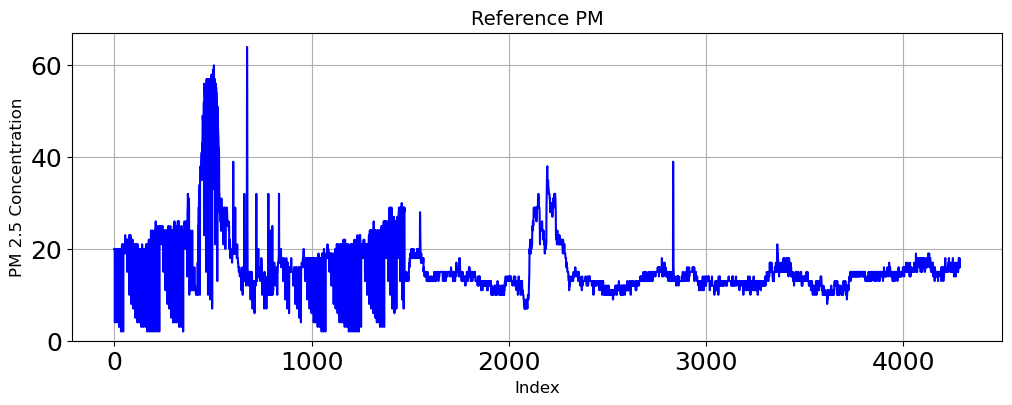

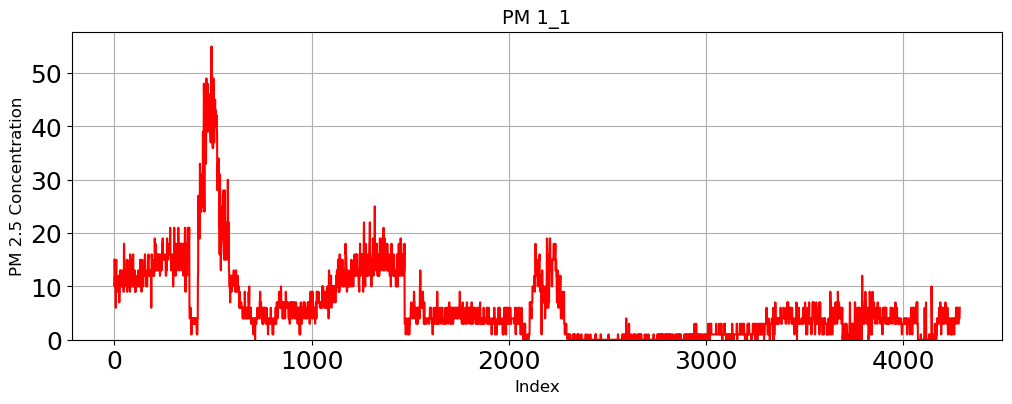

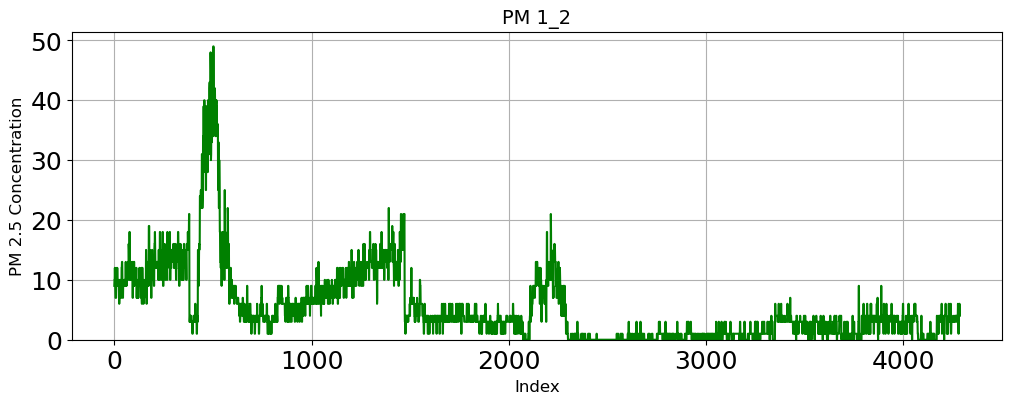

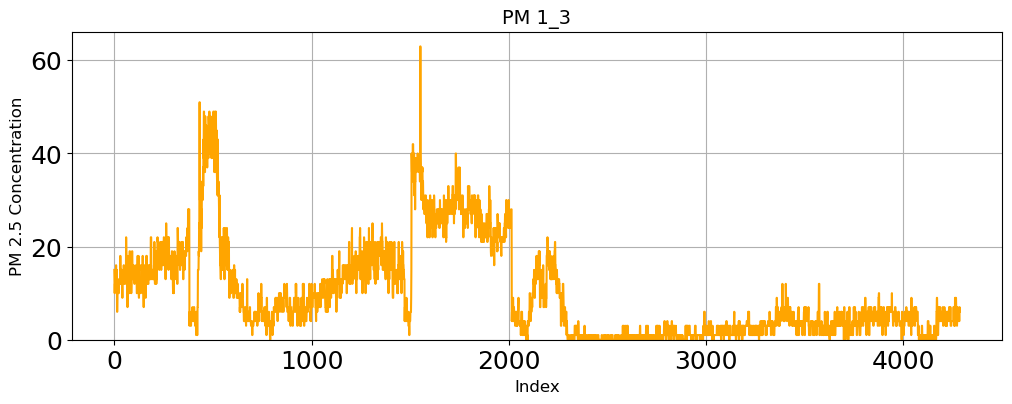

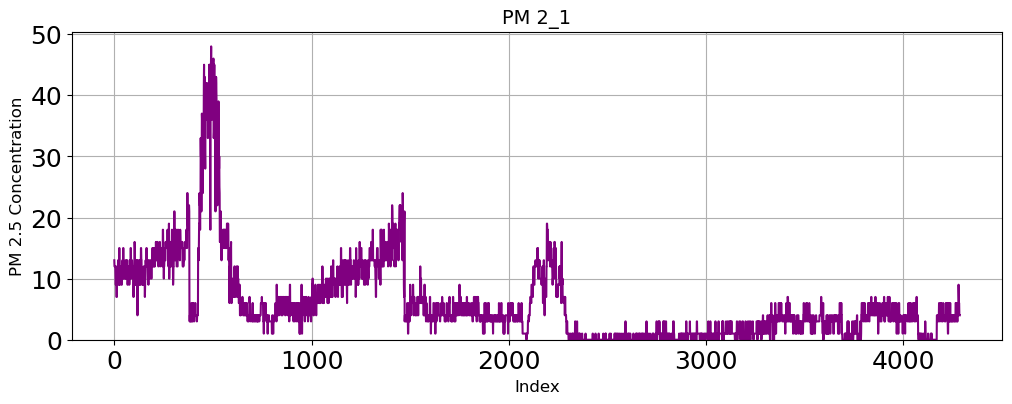

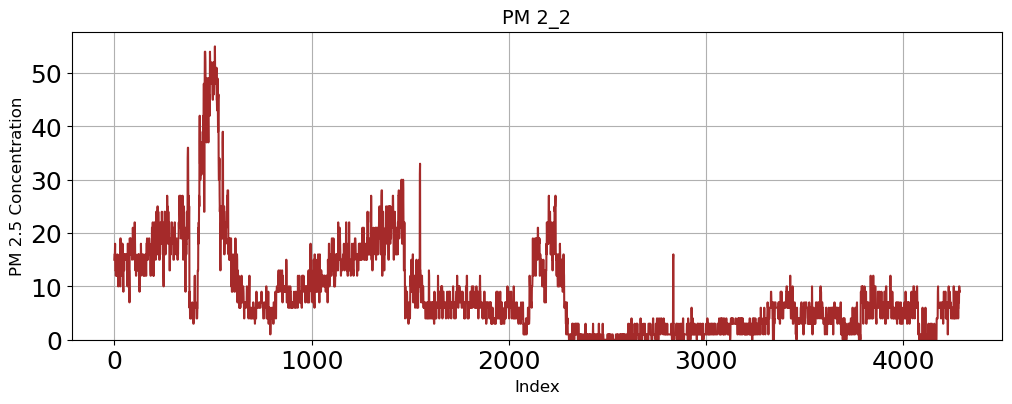

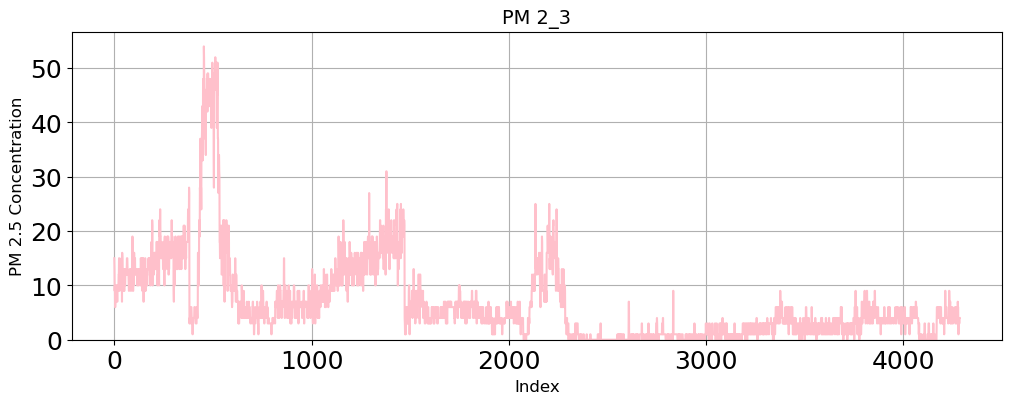

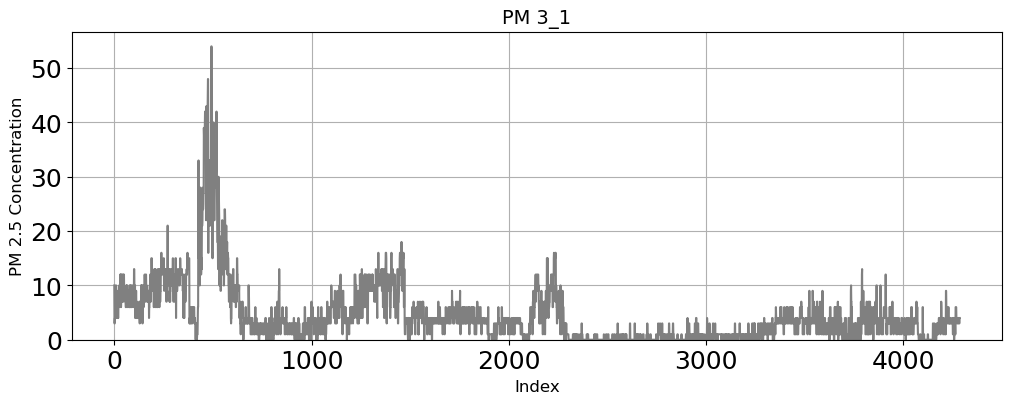

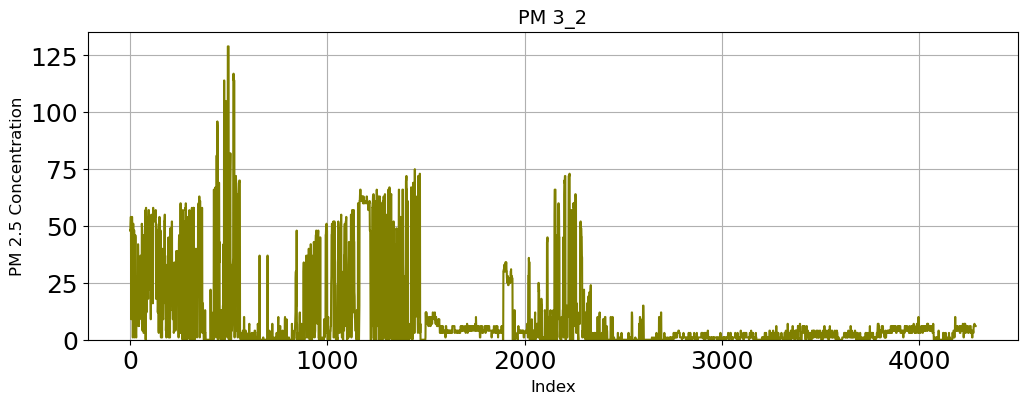

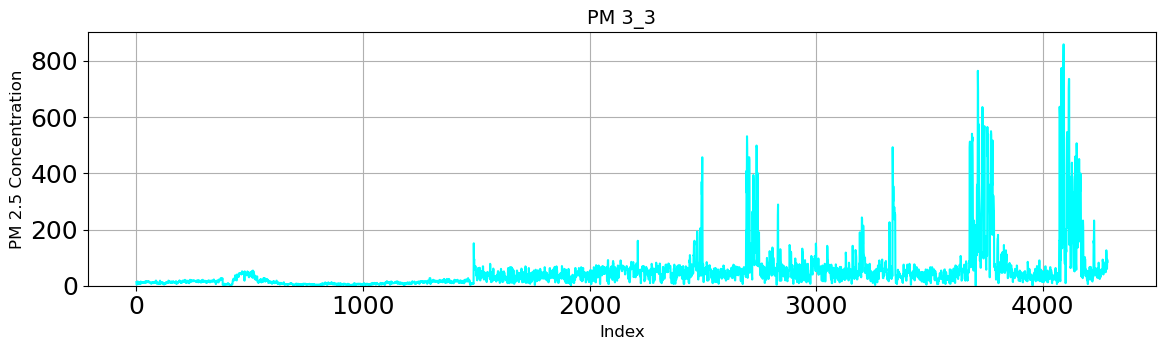

In [119]:

import matplotlib.pyplot as plt

# Define the directory where plots will be saved
output_directory = 'D:/PLOTS/SENSORS/'

# List of sensor column names (including reference sensor)
sensors_to_plot = ['reference_pm_after', 'pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3']
titles = ['Reference PM', 'PM 1_1', 'PM 1_2', 'PM 1_3', 'PM 2_1', 'PM 2_2', 'PM 2_3', 'PM 3_1', 'PM 3_2', 'PM 3_3']

# Assign colors to each plot
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Number of points to plot (e.g., 1500)
num_points = 5000

# Slice the DataFrame to limit the number of points
df_limited = df.iloc[:num_points]  # This limits the data to the first 1500 rows

# Loop through each sensor and plot individually
for i, (title, col_name) in enumerate(zip(titles, sensors_to_plot)):
    # Create a new figure for each plot
    plt.figure(figsize=(12, 4))
    plt.plot(df_limited.index, df_limited[col_name], color=colors[i], linestyle='-')
    plt.title(title, fontsize=14)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('PM 2.5 Concentration', fontsize=12)
    plt.ylim(bottom=0)
    plt.grid(True)
    
    # Save the plot to the output directory for each sensor
    plot_filename = f"{output_directory}{col_name}_distribution_plot.png"
    plt.savefig(plot_filename)
    print(f"Plot for {col_name} saved to {plot_filename}")
    
    # Close the plot to free up memory
#     plt.close()


# Adjust layout to avoid overlap
plt.tight_layout(rect=[0, 0, 1, 0.96])

# Close the plot to avoid displaying it
# plt.close()
plt.show()


In [507]:
# df.dtypes

Plot for Group 1 saved to D:/PLOTS/GROUPED SENSORS/Group_1_sensors_plot.png


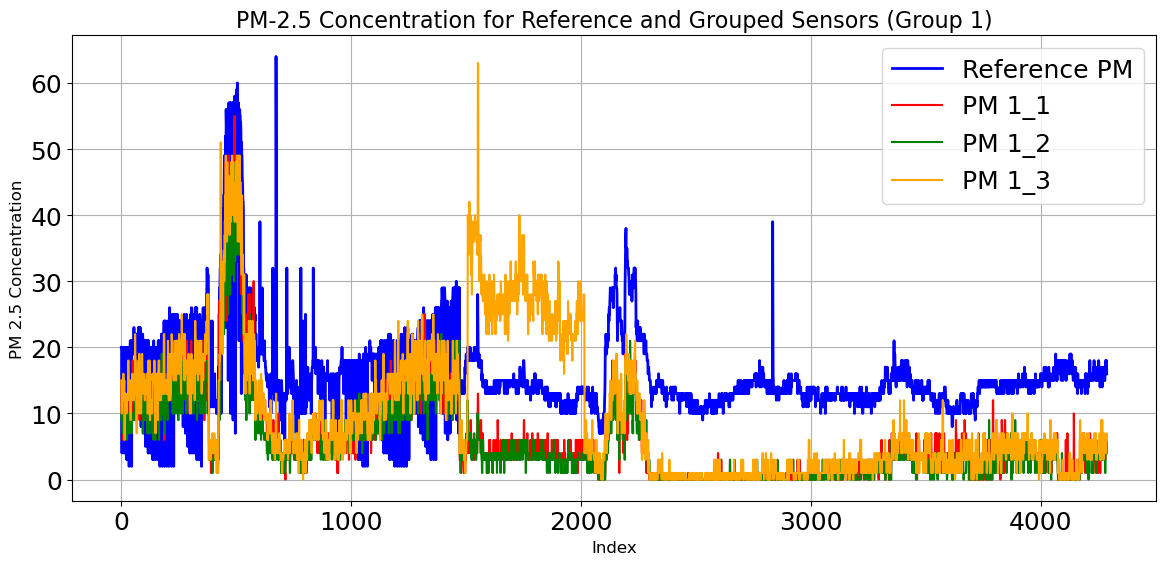

Plot for Group 2 saved to D:/PLOTS/GROUPED SENSORS/Group_2_sensors_plot.png


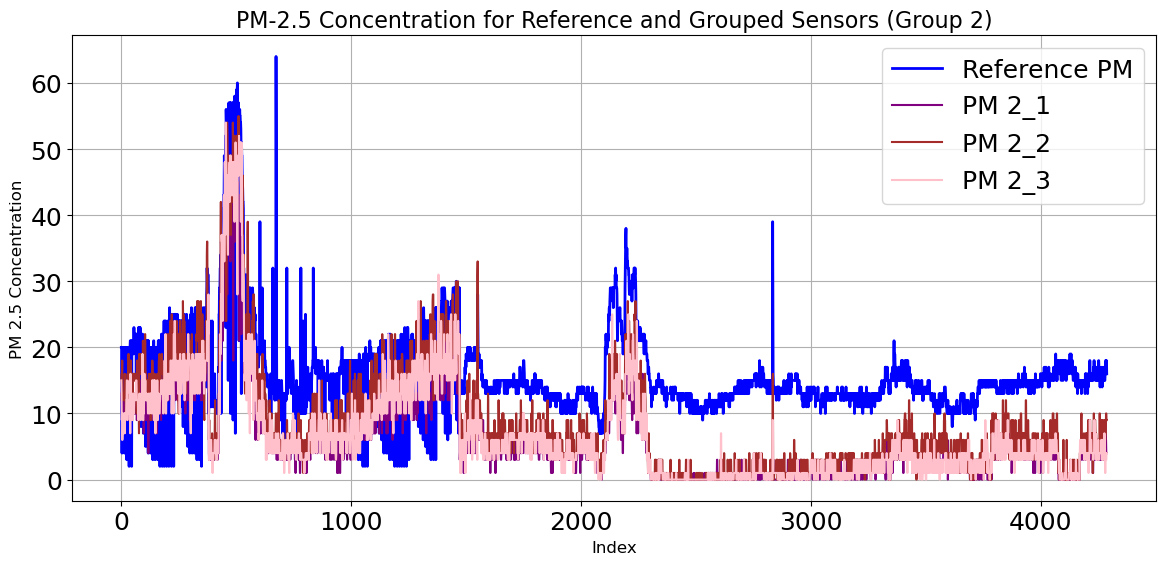

Plot for Group 3 saved to D:/PLOTS/GROUPED SENSORS/Group_3_sensors_plot.png


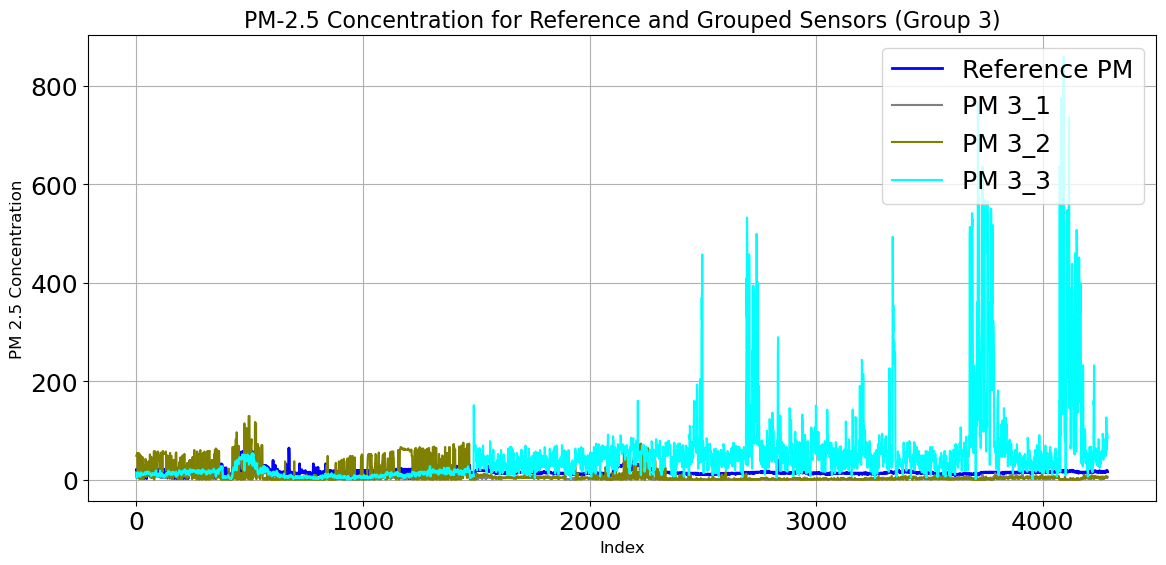

In [508]:

import matplotlib.pyplot as plt

# Define the directory where plots will be saved
output_directory = 'D:/PLOTS/GROUPED SENSORS/'

# List of sensor column names (including reference sensor)
sensors_to_plot = ['reference_pm_after', 'pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3']
titles = ['Reference PM', 'PM 1_1', 'PM 1_2', 'PM 1_3', 'PM 2_1', 'PM 2_2', 'PM 2_3', 'PM 3_1', 'PM 3_2', 'PM 3_3']

# Assign colors to each plot
colors = ['blue', 'red', 'green', 'orange', 'purple', 'brown', 'pink', 'gray', 'olive', 'cyan']

# Number of points to plot (e.g., 1500)
num_points = 5000

# Slice the DataFrame to limit the number of points
df_limited = df.iloc[:num_points]  # This limits the data to the first 1500 rows

# Grouping the sensors in sets of 3 along with the reference sensor
for group_number, group_start in enumerate(range(1, len(sensors_to_plot), 3)):
    plt.figure(figsize=(12, 6))
    
    # Plot the reference sensor
    plt.plot(df_limited.index, df_limited['reference_pm_after'], label='Reference PM', color='blue', linewidth=2)
    
    # Plot 3 other sensors in the group
    for i in range(group_start, group_start + 3):
        if i < len(sensors_to_plot):
            plt.plot(df_limited.index, df_limited[sensors_to_plot[i]], label=titles[i], color=colors[i])
    
    # Add labels and title
    plt.title(f'PM-2.5 Concentration for Reference and Grouped Sensors (Group {group_number + 1})', fontsize=16)
    plt.xlabel('Index', fontsize=12)
    plt.ylabel('PM 2.5 Concentration', fontsize=12)
    
    # Add grid and legend
    plt.grid(True)
    plt.legend(loc='upper right')  # Show the legend in the top right corner
    
    # Save the plot to the output directory
    plot_filename = f"{output_directory}Group_{group_number + 1}_sensors_plot.png"
    plt.savefig(plot_filename)
#     plt.close()  # Close the plot to free memory
    
    print(f"Plot for Group {group_number + 1} saved to {plot_filename}")

#  Show the plot
    plt.tight_layout()
    plt.show()







# FEATURE SELECTION

In [122]:
# Drop the time column for feature correlation analysis
# df_dropped = df.drop(columns=['datetime','npm'])
df_dropped = df.drop(columns=['datetime'])
# df_dropped

Heatmap saved to D:/PLOTS/HEATMAP/correlation_matrix_heatmap.png


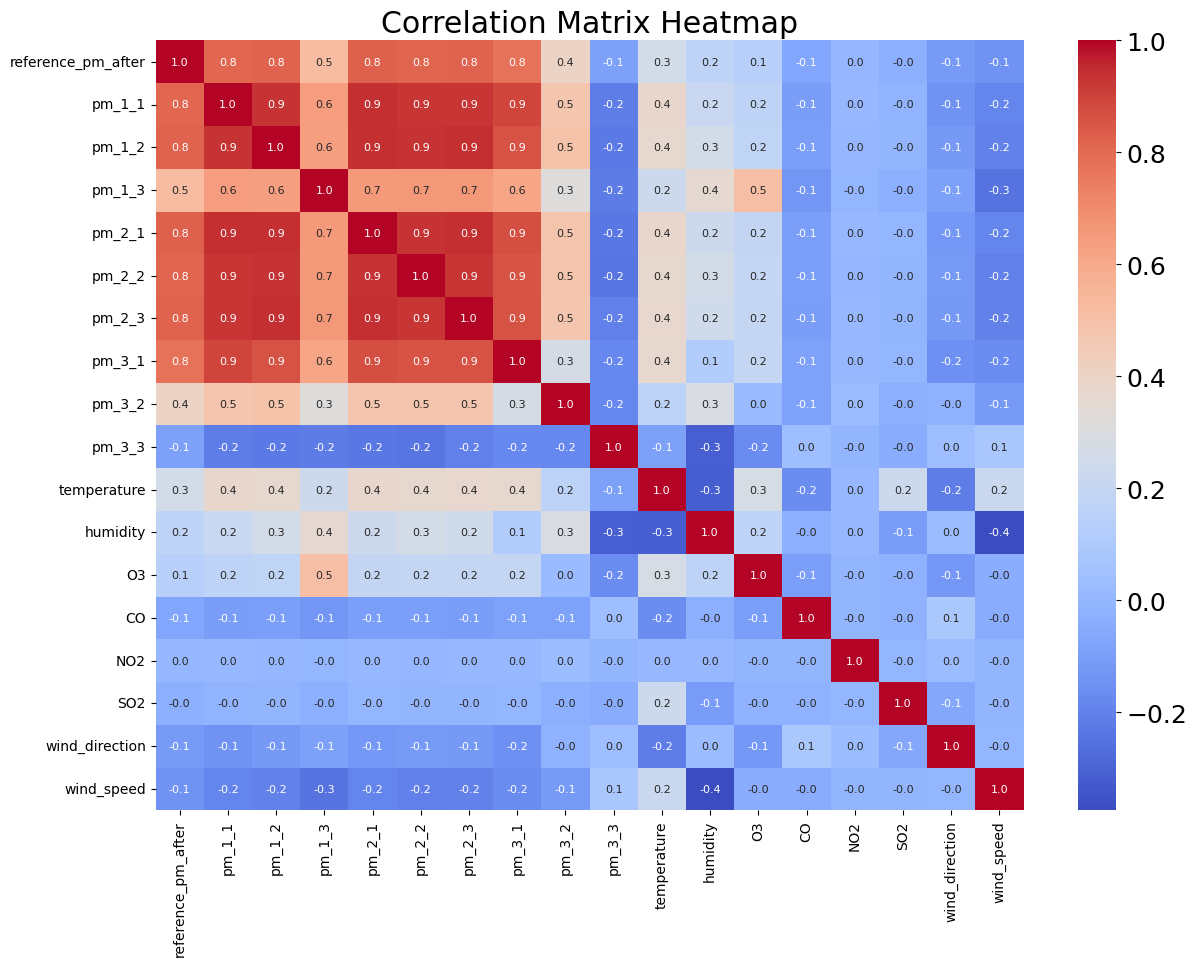

In [123]:
# import seaborn as sns
# import matplotlib.pyplot as plt

# # Calculate the correlation matrix
# corr = df_dropped.corr()

# # Plot a heatmap of the correlation matrix
# plt.figure(figsize=(9, 8))
# sns.heatmap(corr, annot=True, cmap='coolwarm')
# plt.show()



import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
corr = df_dropped.corr()

# Plot a heatmap of the correlation matrix
plt.figure(figsize=(14, 10))  # Adjusted figure size for better readability
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".1f", annot_kws={'size': 8})
plt.title('Correlation Matrix Heatmap')  # Optional: add a title for clarity

# Adjust font size for better visibility if needed
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)

# Save the plot to the output directory
output_directory = 'D:/PLOTS/HEATMAP/'
plot_filename = f"{output_directory}correlation_matrix_heatmap.png"
plt.savefig(plot_filename)
# plt.close()  # Close the plot to free memory

print(f"Heatmap saved to {plot_filename}")




In [20]:
# Drop the time column for feature correlation analysis
# df1 = df.drop(columns=['npm','wind_direction','SO2','CO'])
# df1 = df.drop(columns=['wind_direction','SO2','CO'])
# df1 = df.drop(columns=['wind_direction','SO2','CO'])
# df_dropped

In [21]:
# df1.info()

# NORMALIZATION

In [513]:
# # Drop rows with missing values or handle them appropriately (e.g., using interpolation)
# df.dropna(inplace=True)

# # Define the features (predictors) and target
# features = df1[['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3',
#                'temperature', 'humidity','O3','NO2','wind_speed']]
# target = df1['reference_pm_after']  # This is the RPM you're trying to predict

# Define the features (predictors) and target
# features = df[['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'pm_3_3',
#                'temperature', 'humidity','O3','NO2','wind_speed','SO2','CO']]
features = df[['pm_1_1', 'pm_1_2', 'pm_1_3', 'pm_2_1', 'pm_2_2', 'pm_2_3', 'pm_3_1', 'pm_3_2', 'temperature', 'humidity','O3']]
target = df['reference_pm_after']  # This is the RPM you're trying to predict




In [514]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

# Assume 'features' is a DataFrame containing the features you want to scale
scaler = MinMaxScaler()

# Fit and transform the features
scaled = scaler.fit_transform(features)

# Convert the scaled data back to a DataFrame with the original column names
df_scaled = pd.DataFrame(scaled, columns=features.columns)

# Display the scaled DataFrame
df_scaled


,pm_1_1,pm_1_2,pm_1_3,pm_2_1,pm_2_2,pm_2_3,pm_3_1,pm_3_2,temperature,humidity,O3
0,0.272727,0.183673,0.238095,0.270833,0.272727,0.277778,0.185185,0.372093,0.434944,0.842697,0.096257
1,0.181818,0.204082,0.190476,0.250000,0.290909,0.240741,0.055556,0.372093,0.434944,0.845194,0.096257
2,0.181818,0.204082,0.158730,0.250000,0.290909,0.166667,0.055556,0.395349,0.434944,0.851436,0.096257
3,0.218182,0.244898,0.190476,0.250000,0.290909,0.185185,0.074074,0.418605,0.434944,0.852684,0.092692
4,0.218182,0.204082,0.190476,0.250000,0.327273,0.111111,0.074074,0.418605,0.431227,0.851436,0.090909
...,...,...,...,...,...,...,...,...,...,...,...
4282,0.072727,0.081633,0.095238,0.125000,0.127273,0.074074,0.074074,0.046512,0.003717,0.579276,0.000000
4283,0.072727,0.081633,0.063492,0.125000,0.181818,0.055556,0.055556,0.046512,0.003717,0.579276,0.000000
4284,0.072727,0.122449,0.063492,0.083333,0.181818,0.055556,0.055556,0.046512,0.000000,0.581773,0.000000
4285,0.072727,0.122449,0.111111,0.083333,0.163636,0.074074,0.074074,0.046512,0.000000,0.586767,0.000000


In [515]:
# Split the data into training and test sets
# X_train, X_test, y_train, y_test = train_test_split(df_scaled, target, test_size=0.2, random_state=42)

# Assuming your target variable is defined as 'target' and 'df_scaled' holds your features
train_size = int(len(df_scaled) * 0.8)

# Split the scaled features and the target
train_df, test_df = df_scaled.iloc[:train_size], df_scaled.iloc[train_size:]
train_target, test_target = target.iloc[:train_size], target.iloc[train_size:]



In [516]:
len(train_df),len(test_df),len(train_target),len(test_target)

(3429, 858, 3429, 858)

# dataset preparation

In [517]:
def create_dataset(X, y, window_size):  # One hour = 60 minutes of data
    Xs, ys = [], []
    # Adjust the sliding window to move by one hour (non-overlapping)
    for i in range(0, len(X) - window_size + 1, window_size):
        Xs.append(X.iloc[i:i+window_size].values)
        ys.append(y.iloc[i:i+window_size].values)
    return np.array(Xs), np.array(ys)

# Create the training and test datasets with a one-hour sliding window
X_train, y_train = create_dataset(train_df, train_target, window_size=60)
X_test, y_test = create_dataset(test_df, test_target, window_size=60)




# def create_dataset(X, y, window_size):  # One hour = 60 minutes of data
#     Xs, ys = [], []
#     # Adjust the sliding window to move by one hour (non-overlapping)
#     for i in range(0, len(X) - window_size + 1, window_size):
#         Xs.append(X.iloc[i:i+window_size].values)
#         ys.append(y.iloc[i:i+window_size].values)
#     return np.array(Xs), np.array(ys)

# # Create the training and test datasets with a one-hour sliding window
# X_train, y_train = create_dataset(X_train, y_train, window_size=60)
# X_test, y_test = create_dataset(X_test, y_test, window_size=60)



In [518]:
len(X_train),len(X_test),len(y_train),len(y_test,)

(57, 14, 57, 14)

In [519]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((57, 60, 11), (57, 60), (14, 60, 11), (14, 60))

# DEEP LEARNING MODEL 

# RNN_model

In [520]:
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.regularizers import l2


model_RNN = keras.Sequential()
model_RNN.add(keras.layers.SimpleRNN(32, activation='relu', input_shape=(X_train.shape[1], X_train.shape[2]), return_sequences=True))
model_RNN.add(keras.layers.Dropout(0.45))
model_RNN.add(keras.layers.SimpleRNN(16, activation='relu', return_sequences=True, kernel_regularizer=l2(0.0001)))
model_RNN.add(keras.layers.SimpleRNN(16, activation='relu', return_sequences=True))
model_RNN.add(keras.layers.SimpleRNN(16, activation='relu', return_sequences=True))
model_RNN.add(keras.layers.SimpleRNN(8, activation='relu', return_sequences=True))
# model_RNN.add(keras.layers.SimpleRNN(16, activation='relu', return_sequences=True))
# model_RNN.add(keras.layers.SimpleRNN(8, activation='relu', return_sequences=True))
# model_RNN.add(keras.layers.Dropout(0.2))
model_RNN.add(keras.layers.Dense(1))
model_RNN.summary()






Model: "sequential_60"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_300 (SimpleRNN)  (None, 60, 32)            1408      
                                                                 
 dropout_67 (Dropout)        (None, 60, 32)            0         
                                                                 
 simple_rnn_301 (SimpleRNN)  (None, 60, 16)            784       
                                                                 
 simple_rnn_302 (SimpleRNN)  (None, 60, 16)            528       
                                                                 
 simple_rnn_303 (SimpleRNN)  (None, 60, 16)            528       
                                                                 
 simple_rnn_304 (SimpleRNN)  (None, 60, 8)             200       
                                                                 
 dense_64 (Dense)            (None, 60, 1)           

In [467]:
# # Train the model
# rnn_model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test))

optimizer = Adam(learning_rate=0.001)
model_RNN.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history_RNN = model_RNN.fit(X_train, y_train, epochs=150, batch_size=8, validation_split=0.2, callbacks=[early_stop])


Epoch 1/150
12/12 [==============================] - 4s 60ms/step - loss: 404.5536 - val_loss: 184.8210
Epoch 2/150
12/12 [==============================] - 0s 27ms/step - loss: 381.9961 - val_loss: 159.2199
Epoch 3/150
12/12 [==============================] - 0s 25ms/step - loss: 228.7697 - val_loss: 59.5501
Epoch 4/150
12/12 [==============================] - 0s 26ms/step - loss: 125.3060 - val_loss: 50.6876
Epoch 5/150
12/12 [==============================] - 0s 28ms/step - loss: 85.0038 - val_loss: 35.0650
Epoch 6/150
12/12 [==============================] - 0s 28ms/step - loss: 75.8799 - val_loss: 32.4314
Epoch 7/150
12/12 [==============================] - 0s 25ms/step - loss: 67.0465 - val_loss: 31.6611
Epoch 8/150
12/12 [==============================] - 0s 24ms/step - loss: 56.3781 - val_loss: 31.9817
Epoch 9/150
12/12 [==============================] - 0s 25ms/step - loss: 51.2528 - val_loss: 32.3829
Epoch 10/150
12/12 [==============================] - 0s 25ms/step - loss: 4

# save_rnn_model

In [497]:
# Set the directory where models will be saved
save_dir = "D:/saved_models/RNN/"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Get the next model number by checking existing files in the directory
existing_models = [f for f in os.listdir(save_dir) if 'Model' in f]
model_number = len(existing_models) + 1

# Define the paths for saving the model and weights
model_path = os.path.join(save_dir, f"Model_{model_number}.h5")
weights_path = os.path.join(save_dir, f"model_weights_{model_number}.h5")

# Save the entire model
model_RNN.save(model_path)

# Save just the weights
model_RNN.save_weights(weights_path)

print(f"Model saved as: {model_path}")
print(f"Weights saved as: {weights_path}")


Model saved as: D:/saved_models/RNN/Model_6.h5
Weights saved as: D:/saved_models/RNN/model_weights_6.h5


C:\Users\esnta\anaconda3\Lib\site-packages\keras\src\engine\training.py:3079: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


# rnn_model evaluation

In [473]:
y_pred_RNN = model_RNN.predict(X_test)



1/1 [==============================] - 0s 27ms/step


In [474]:
from sklearn.metrics import mean_squared_error

y_test_expanded = np.expand_dims(y_test, axis=-1)

rmse_values = np.sqrt(mean_squared_error(y_test_expanded.reshape(-1), y_pred_RNN.reshape(-1)))
rmse = np.mean(rmse_values)

rmse

5.17310029947622

In [512]:
# y_pred_RNN.shape, y_test_expanded.shape

Text(0.5, 1.0, 'RNN Loss')

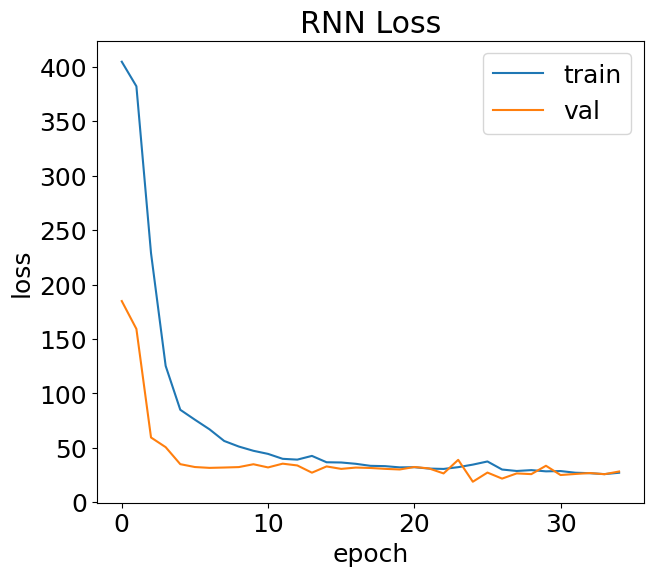

In [476]:

# RNN loss 그래프

plt.rcParams.update({'font.size': 18})
plt.figure(figsize=(24, 6))

plt.subplot(1, 3, 1)
plt.plot(history_RNN.history['loss'])
plt.plot(history_RNN.history['val_loss'])
plt.xlabel('epoch')
plt.ylabel('loss')
plt.legend(['train', 'val'])
plt.title('RNN Loss')

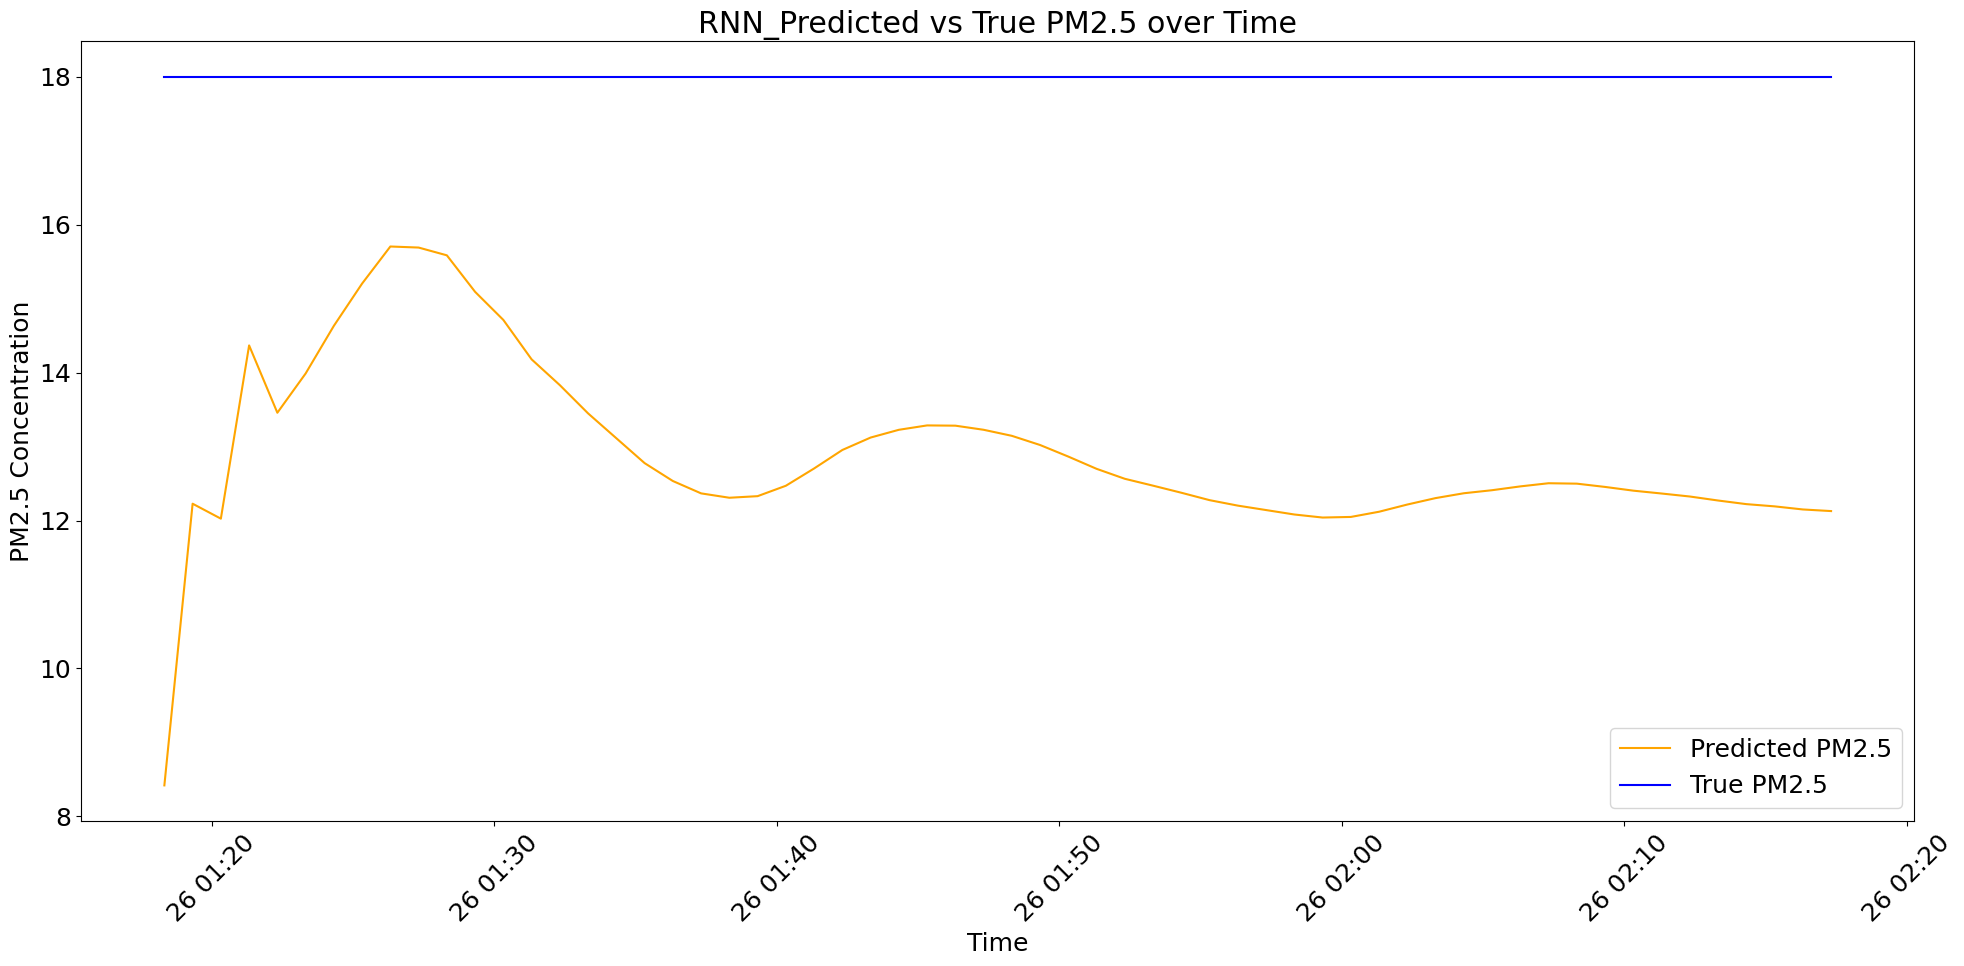

In [496]:
import matplotlib.pyplot as plt
import pandas as pd

# Define the start time from your dataset (adjust as needed for your actual start time)
start_time = pd.to_datetime('2024-09-26 01:18:19')  # Starting from your first datetime entry

# Generate the time index based on one-minute intervals
time_index = pd.date_range(start=start_time, periods=len(y_pred_RNN[3]), freq='T')  # 'T' for minute frequency

# Create DataFrames for predicted and true values with the correct time index
predicted_df_RNN = pd.DataFrame(data=y_pred_RNN[3], index=time_index, columns=['Predicted PM2.5'])
true_df = pd.DataFrame(data=y_test[3], index=time_index, columns=['True PM2.5'])

# Plot the predicted and actual PM2.5 values
plt.figure(figsize=(20, 10))
plt.plot(predicted_df_RNN.index, predicted_df_RNN['Predicted PM2.5'], label='Predicted PM2.5', color='orange')
plt.plot(true_df.index, true_df['True PM2.5'], label='True PM2.5', color='blue')
plt.title('RNN_Predicted vs True PM2.5 over Time')
plt.xlabel('Time')
plt.ylabel('PM2.5 Concentration')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


# DNN _Model 

# dataset preparation

In [521]:
# Adjust the create_sequences function to handle multiple features
def create_sequences(data, target, time_steps=1):
    X, y = [], []
    for i in range(len(data) - time_steps):
        X.append(data[i:i+time_steps])  # Get sequences for features
        y.append(target[i + time_steps])  # Get the corresponding target value
    return np.array(X), np.array(y)

# Define time steps (for example, a sliding window size)
time_steps = 60  # Adjust based on your time window needs

# Create sequences
X, y = create_sequences(df_scaled.values, target.values, time_steps)



In [522]:
X_train_flat = X.reshape(X.shape[0], -1)  # Flatten time steps and features
# X_test_flat = X_test.reshape(X_test.shape[0], -1)


In [523]:
from sklearn.model_selection import train_test_split

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_train_flat, y, test_size=0.2, random_state=42)

# Display the shapes of the datasets
print(f"X_train shape: {X_train.shape}, y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}, y_test shape: {y_test.shape}")

X_train shape: (3381, 660), y_train shape: (3381,)
X_test shape: (846, 660), y_test shape: (846,)


# dnn_model_training

In [525]:
from tensorflow.keras import layers, models

def create_dnn_model(input_shape):
    model = models.Sequential()
    model.add(layers.Dense(64, activation='relu', input_shape=(input_shape,)))
    model.add(layers.Dense(32, activation='relu'))
    model.add(layers.Dense(1))  # 1 output unit for regression
    return model

# Create and compile the model
dnn_model = create_dnn_model(X_train.shape[1])

# Summary of the model
dnn_model.summary()

Model: "sequential_62"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_68 (Dense)            (None, 64)                42304     
                                                                 
 dense_69 (Dense)            (None, 32)                2080      
                                                                 
 dense_70 (Dense)            (None, 1)                 33        
                                                                 
Total params: 44417 (173.50 KB)
Trainable params: 44417 (173.50 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [526]:
optimizer = Adam(learning_rate=0.001)
dnn_model.compile(optimizer=optimizer, loss='mean_squared_error')

early_stop = EarlyStopping(monitor='val_loss', patience=10)

history_DNN = dnn_model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, callbacks=[early_stop])


Epoch 1/100
169/169 [==============================] - 3s 5ms/step - loss: 64.5621 - val_loss: 27.0700
Epoch 2/100
169/169 [==============================] - 0s 3ms/step - loss: 22.1194 - val_loss: 18.9025
Epoch 3/100
169/169 [==============================] - 0s 2ms/step - loss: 17.2864 - val_loss: 17.2896
Epoch 4/100
169/169 [==============================] - 0s 2ms/step - loss: 16.1457 - val_loss: 16.6100
Epoch 5/100
169/169 [==============================] - 0s 2ms/step - loss: 15.3638 - val_loss: 15.9847
Epoch 6/100
169/169 [==============================] - 0s 2ms/step - loss: 14.6846 - val_loss: 15.5517
Epoch 7/100
169/169 [==============================] - 0s 2ms/step - loss: 14.2537 - val_loss: 15.4920
Epoch 8/100
169/169 [==============================] - 0s 2ms/step - loss: 13.6688 - val_loss: 16.0118
Epoch 9/100
169/169 [==============================] - 0s 2ms/step - loss: 13.4361 - val_loss: 15.1321
Epoch 10/100
169/169 [==============================] - 0s 2ms/step - los

In [527]:
# # Fit the model
# history = model.fit(X_train, y_train, epochs=100, batch_size=16, validation_split=0.2, verbose=1)

# dnn_model_saving

In [529]:
# Set the directory where models will be saved
save_dir = "D:/saved_models/DNN/"

# Create the directory if it doesn't exist
if not os.path.exists(save_dir):
    os.makedirs(save_dir)

# Get the next model number by checking existing files in the directory
existing_models = [f for f in os.listdir(save_dir) if 'Model' in f]
model_number = len(existing_models) + 1

# Define the paths for saving the model and weights
model_path = os.path.join(save_dir, f"Model_{model_number}.h5")
weights_path = os.path.join(save_dir, f"model_weights_{model_number}.h5")

# Save the entire model
dnn_model.save(model_path)

# Save just the weights
dnn_model.save_weights(weights_path)

print(f"Model saved as: {model_path}")
print(f"Weights saved as: {weights_path}")


Model saved as: D:/saved_models/DNN/Model_2.h5
Weights saved as: D:/saved_models/DNN/model_weights_2.h5


# dnn_model evaluation

In [530]:
# Make predictions
y_pred = dnn_model.predict(X_test)
# y_pred = y_pred.reshape(-1)


27/27 [==============================] - 0s 2ms/step


In [531]:
y_test.shape, y_pred.shape

((846,), (846, 1))

In [532]:
# y_pred_inverse = scaler.inverse_transform(y_pred)

In [533]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print("RMSE:", rmse)

RMSE: 4.341277485052784


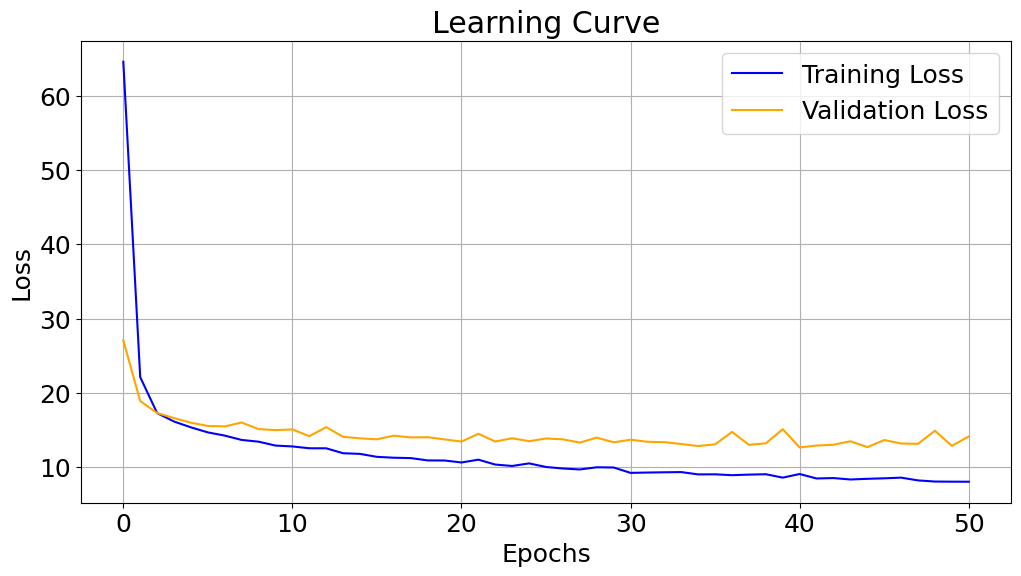

In [534]:
import matplotlib.pyplot as plt

# Function to plot learning curve
def plot_learning_curve(history):
    # Plotting the loss values
    plt.figure(figsize=(12, 6))

    # Training loss over epochs
    plt.plot(history.history['loss'], label='Training Loss', color='blue')
    
    # Validation loss over epochs
    plt.plot(history.history['val_loss'], label='Validation Loss', color='orange')

    # Adding title and labels
    plt.title('Learning Curve')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.grid(True)
    plt.show()

# Call the function with the training history
plot_learning_curve(history_DNN)

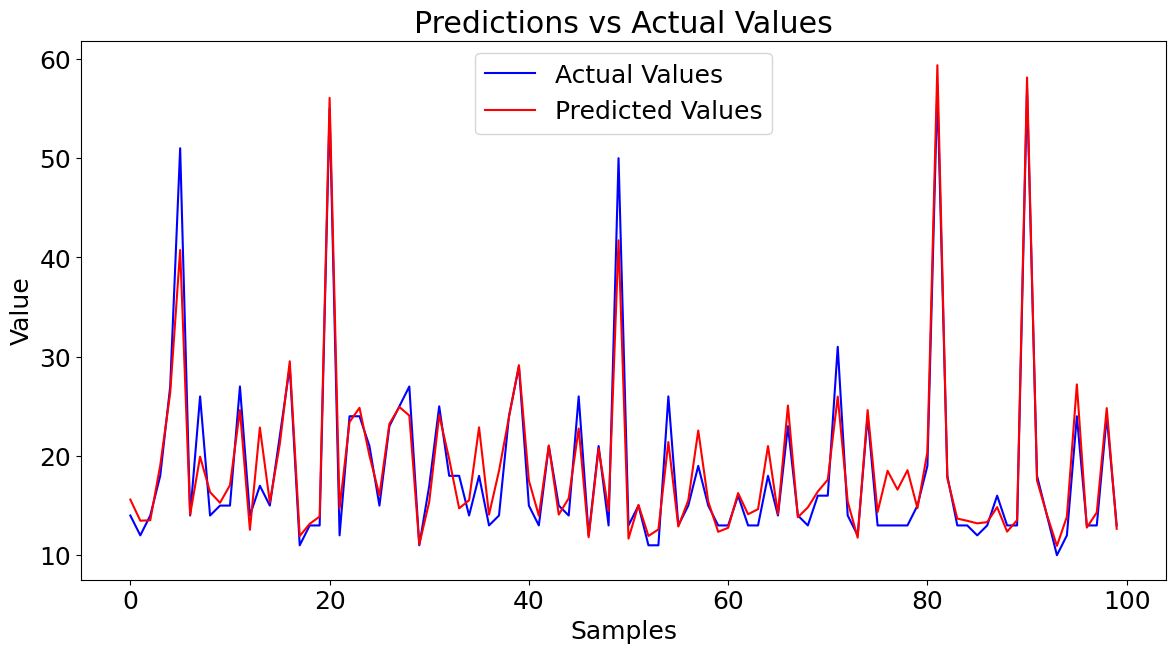

In [535]:
# Calculate RMSE
from sklearn.metrics import mean_squared_error


# Plot predictions vs true values
plt.figure(figsize=(14, 7))
plt.plot(y_test[:100], label='Actual Values', color='blue')
plt.plot(y_pred[:100], label='Predicted Values', color='red')
plt.title('Predictions vs Actual Values')
plt.xlabel('Samples')
plt.ylabel('Value')
plt.legend()
plt.show()


